In [1]:
#整理版


In [2]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

%matplotlib inline
sns.set()

In [3]:
#データの読み込み
lunch_train_data = pd.read_csv("train.csv")
lunch_test_data = pd.read_csv("test.csv")

In [4]:
#データ量の確認
print("trainデータの大きさ",lunch_train_data.shape)
print("testデータの大きさ",lunch_test_data.shape)

trainデータの大きさ (207, 12)
testデータの大きさ (40, 11)


# カラムの確認

In [5]:
#カラム名

lunch_train_data.columns

#y→販売数
#week→曜日
#soldoutm→完売フラグ
#name→メインメニュー
#kcal→おかずのカロリー
#remarks→特記事項
#event→社内イベント
#payday→給料フラグ

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

In [6]:
#各データの型を確認
lunch_train_data.dtypes

datetime          object
y                  int64
week              object
soldout            int64
name              object
kcal             float64
remarks           object
event             object
payday           float64
weather           object
precipitation     object
temperature      float64
dtype: object

In [7]:
lunch_train_data.describe()

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [123]:
#訓練データ
#期間が11月～9月

lunch_train_data.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [124]:
#テストデータ
#機関が10月～11月

lunch_test_data.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


# データの欠損

In [125]:
#各カラムの欠損数
lunch_train_data.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

# 量的データについて

    欠損のない販売数と気温から調べる

In [126]:
date = pd.to_datetime(lunch_train_data["datetime"])

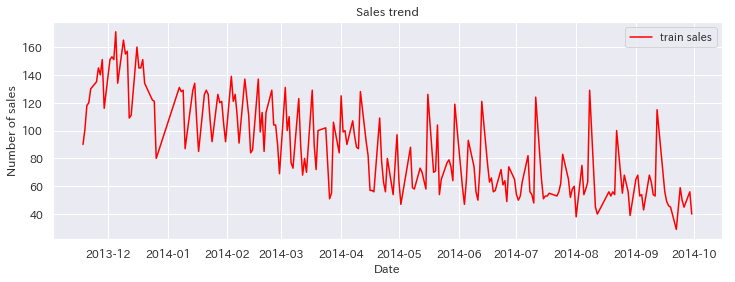

In [183]:
#販売数の推移

x1 = pd.date_range('2013-11-18 00:00:00',periods=207,freq='B')


plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["y"],label="train sales",c = "red")

plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()


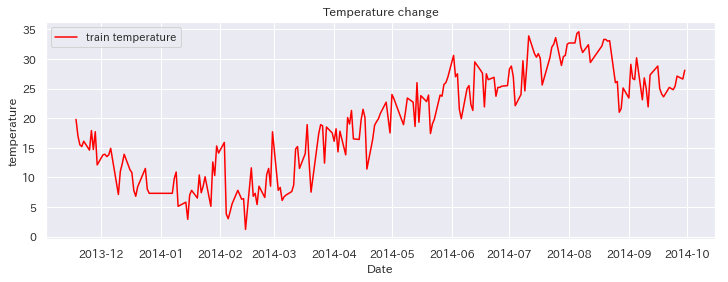

In [182]:
#気温の推移
plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["temperature"],label="train temperature",c= "red")

plt.title("Temperature change")
plt.ylabel("temperature")
plt.xlabel("Date")
plt.legend()

    ・気温が低いときは弁当の売り上げが上がる、気温が高いときは弁当の売り上げが下がる傾向が読み取れる

# 散布図、相関を確認

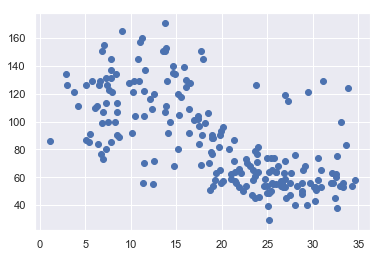

In [129]:
#散布図
plt.scatter(lunch_train_data["temperature"],lunch_train_data["y"])

In [130]:
#相関係数
np.corrcoef(lunch_train_data["temperature"],lunch_train_data["y"])

array([[ 1.        , -0.65533219],
       [-0.65533219,  1.        ]])

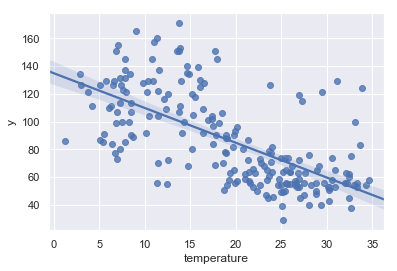

In [131]:
sns.regplot(x = lunch_train_data["temperature"],y = lunch_train_data["y"])

    弁当の売り上げと気温には負の相関関係がある

# カテゴリデータについて

# メニュー

In [132]:
lunch_menu = lunch_train_data["name"].unique()
print("訓練用メニューの種類:",len(lunch_menu))

訓練用メニューの種類: 156


In [133]:
#多い順にいくつか表示する
lunch_menu_count = pd.DataFrame(lunch_train_data["name"].value_counts()).rename(columns = {"name":"count"})
display(lunch_menu_count.head(25))

,count
メンチカツ,6
タンドリーチキン,6
手作りロースカツ,5
マーボ豆腐,4
肉じゃが,4
回鍋肉,4
鶏の唐揚げおろしソース,4
手作りひれかつ,3
酢豚,3
チンジャオロース,3


In [134]:
print("1回しかメニューに表示されていないもの",len(lunch_menu_count[lunch_menu_count["count"] == 1]),"種類")

1回しかメニューに表示されていないもの 131 種類


    種類が多い

# 特記事項

In [135]:
remark = list(lunch_train_data["remarks"].dropna().unique())
print("特記事項の種類:",len(remark))
print(remark)

特記事項の種類: 6
['鶏のレモンペッパー焼（50食）、カレー（42食）', '酢豚（28食）、カレー（85食）', 'お楽しみメニュー', '料理長のこだわりメニュー', '手作りの味', 'スペシャルメニュー（800円）']


In [136]:
#各出現回数
remark_count = pd.DataFrame(lunch_train_data["remarks"].dropna().value_counts()).rename(columns = {"remarks":"counts"})

display(remark_count)

,counts
お楽しみメニュー,12
料理長のこだわりメニュー,5
スペシャルメニュー（800円）,1
酢豚（28食）、カレー（85食）,1
鶏のレモンペッパー焼（50食）、カレー（42食）,1
手作りの味,1


    お楽しみメニュー、料理長のこだわりメニューが多い

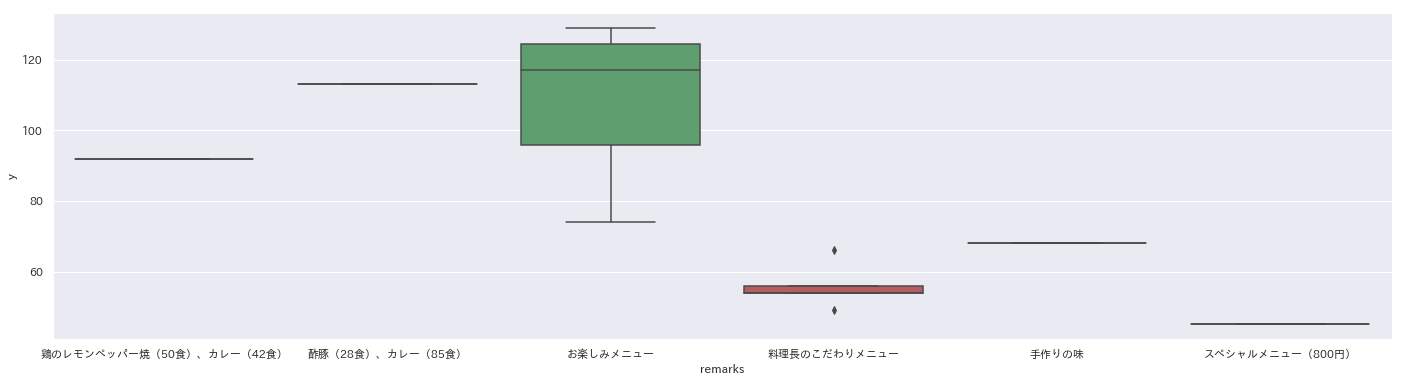

In [137]:
#箱ひげ図の作成
plt.rcParams['font.family'] = 'IPAexGothic'
plt.figure(figsize=(24,6))
sns.boxplot(x = lunch_train_data["remarks"].dropna(),y = lunch_train_data["y"],data = lunch_train_data)

    販売数の平均は86であるため、お楽しみメニューは比較的平均以上の販売数を出している

In [138]:
print("お楽しみメニューの日数",len(lunch_train_data[lunch_train_data["remarks"] == "お楽しみメニュー"]),"日")

お楽しみメニューの日数 12 日


In [139]:
print("メニュー数",len(lunch_train_data[lunch_train_data["remarks"] == "お楽しみメニュー"]["name"].unique()))

print(lunch_train_data[lunch_train_data["remarks"] == "お楽しみメニュー"]["name"].unique())

メニュー数 7
['キーマカレー' 'チキンカレー' '中華丼' 'ポークカレー' '牛丼' 'ひやしたぬきうどん・炊き込みご飯' 'ロコモコ丼']


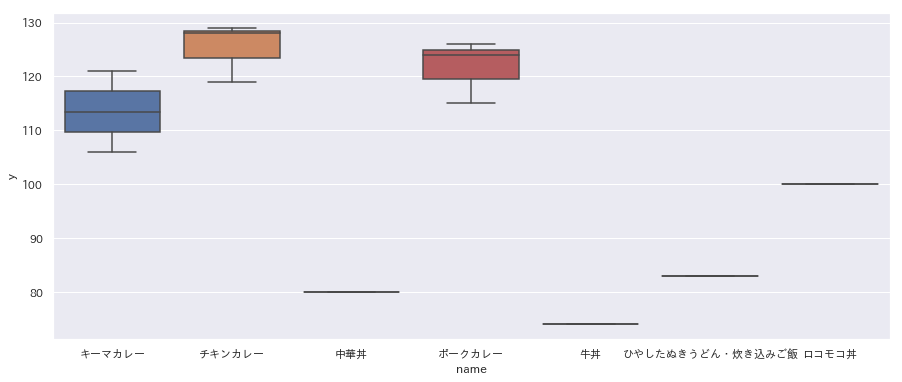

In [140]:
#お楽しみメニューの弁当ごとに箱ひげ図を出してみる

enjoy_menu = lunch_train_data[lunch_train_data["remarks"] == "お楽しみメニュー"]

plt.figure(figsize=(15,6))
sns.boxplot(x = enjoy_menu["name"],y = enjoy_menu["y"],data = enjoy_menu)

    カレーの時は販売数が多い

# SOLD OUTについて

In [141]:
#売り切れるときの弁当について
sold_out_lunch = lunch_train_data[lunch_train_data["soldout"] == 1]

sold_out_lunch_menu = sold_out_lunch["name"].unique()

print("売り切れの弁当の種類は",len(sold_out_lunch_menu),"種類")
print(sold_out_lunch_menu)

売り切れの弁当の種類は 79 種類
['手作りヒレカツ' '若鶏ピリ辛焼' 'ビッグメンチカツ' '鶏の唐揚' 'ボローニャ風カツ' 'マーボ豆腐' '厚揚げ豚生姜炒め'
 'クリームチーズ入りメンチ' 'ハンバーグデミソース' 'タンドリーチキン' '回鍋肉' '鶏の唐揚げ甘酢あん' '手ごね風ハンバーグ'
 '鶏チリソース' '鶏の照り焼きマスタード' 'ジューシーメンチカツ' 'サバ焼味噌掛け' '手作りひれかつとカレー'
 '鶏のレモンペッパー焼orカレー' 'チンジャオロース' 'チーズ入りメンチカツ' '鶏の唐揚げ' 'メダイ照り焼' 'ハンバーグカレーソース'
 'さわら焼味噌掛け' '鶏のピリ辛焼き' '手作りロースカツ' 'ホタテクリ―ムシチュー' 'ロース甘味噌焼き' 'ポークハヤシ'
 '白身魚唐揚げ野菜あんかけ' 'メンチカツ' 'カレイ野菜あんかけ' 'チーズ入りハンバーグ' '越冬キャベツのメンチカツ' '鶏の親子煮'
 '酢豚' '和風ソースハンバーグ' '肉団子のシチュー' '青椒肉絲' 'チキンカレー' '鶏の味噌漬け焼き' '鶏の照り焼きマヨ'
 '豚味噌メンチカツ' '肉じゃが' '手作りチキンカツ' '白身魚唐揚げ野菜餡かけ' '豚肉と茄子のピリ辛炒め' 'チーズハンバーグ'
 'サーモンのムニエル2色ソース' '鶏のカッシュナッツ炒め' '鶏の唐揚げおろしソース' 'いか天ぷら' '牛肉ニンニクの芽炒め' 'チャプチェ'
 '牛すき焼き風' 'ビーフストロガノフ' '豚の冷しゃぶ' '和風ハンバーグ' 'チキンのコーンクリーム焼き' '鶏のから揚げねぎ塩炒めソース'
 '白身魚フライ' '豚すき焼き' 'エビフライ' '八宝菜' 'ジャンボチキンカツ' '豚肉のマスタード焼き' 'ハンバーグ（デミきのこバター）'
 '鶏肉のカレー唐揚' '豚キムチ炒め' '厚切ハムカツ' '牛スキヤキ' 'ロコモコ丼' 'ビーフシチュー' '名古屋味噌カツ'
 'チキンステーキ・きのこソース' '鶏肉の山賊焼き' '白身魚のマスタード焼き' '豚肉と玉子の炒め']


In [142]:
df_sold_out = pd.DataFrame(sold_out_lunch["name"].value_counts()).rename(columns = {"name":"soldout_counts"})

display(df_sold_out.head())

,soldout_counts
タンドリーチキン,5
回鍋肉,3
メンチカツ,3
ロース甘味噌焼き,2
鶏の味噌漬け焼き,2


In [143]:
#売り切れる弁当の平均販売数等を確認する

sold_out_lunch.describe()

,y,soldout,kcal,payday,temperature
count,93.000000,93.0,78.000000,1.0,93.00000
mean,90.193548,1.0,405.948718,1.0,17.76129
std,31.171426,0.0,30.044079,NaN,8.74818
min,40.000000,1.0,315.000000,1.0,1.20000
25%,64.000000,1.0,385.750000,1.0,10.40000
50%,85.000000,1.0,411.500000,1.0,17.40000
75%,121.000000,1.0,430.000000,1.0,24.80000
max,165.000000,1.0,460.000000,1.0,34.60000


    売り切れる弁当に特徴(特定の弁当は売り切れやすい?ところ)はある

In [144]:
df_compare = pd.concat([df_sold_out,lunch_menu_count],axis=1).dropna()

df_compare["Per"] = round(df_compare["soldout_counts"]/df_compare["count"],2)



C:\Users\TSS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [145]:
df_compare.sort_values("count",ascending = False).head(15)

,soldout_counts,count,Per
メンチカツ,3.0,6,0.50
タンドリーチキン,5.0,6,0.83
手作りロースカツ,2.0,5,0.40
鶏の唐揚げおろしソース,1.0,4,0.25
マーボ豆腐,2.0,4,0.50
回鍋肉,3.0,4,0.75
肉じゃが,1.0,4,0.25
チキンカレー,1.0,3,0.33
鶏の味噌漬け焼き,2.0,3,0.67
チンジャオロース,2.0,3,0.67


In [146]:
df_compare.describe()

,soldout_counts,count,Per
count,79.000000,79.000000,79.000000
mean,1.177215,1.544304,0.885823
std,0.593976,1.152450,0.223954
min,1.000000,1.000000,0.250000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.500000,1.000000
max,5.000000,6.000000,1.000000


    販売回数のうち平均88%は売り切れになっている

# 天気

In [147]:
#天気の種類から確認する
print("天気の種類",len(lunch_train_data["weather"].unique()),"種類")
print(lunch_train_data["weather"].unique())

天気の種類 7 種類
['快晴' '曇' '晴れ' '薄曇' '雨' '雪' '雷電']


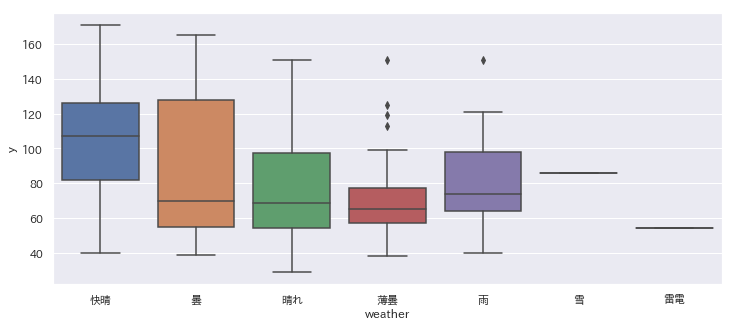

In [148]:
#箱ひげ図の作成
#天候と販売数

plt.figure(figsize=(12,5))
sns.boxplot(x = lunch_train_data["weather"],y = lunch_train_data["y"],data = lunch_train_data)

    快晴のときは販売数平均値が高い

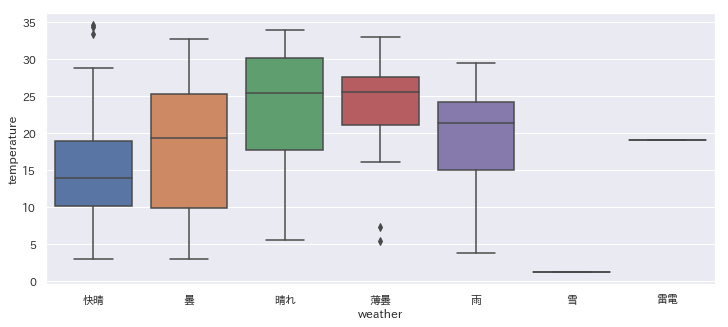

In [149]:
#箱ひげ図の作成
#天候と気温

plt.figure(figsize=(12,5))
sns.boxplot(x = lunch_train_data["weather"],y = lunch_train_data["temperature"],data = lunch_train_data)

# 降水量

In [150]:
df_pre = lunch_train_data[lunch_train_data["precipitation"] != "--"]

In [151]:
print("雨の降った日数",len(df_pre),"日")

weather = df_pre["weather"].unique()

print("雨の降った日の天候",weather)

雨の降った日数 38 日
雨の降った日の天候 ['曇' '雨' '雪' '雷電' '薄曇']


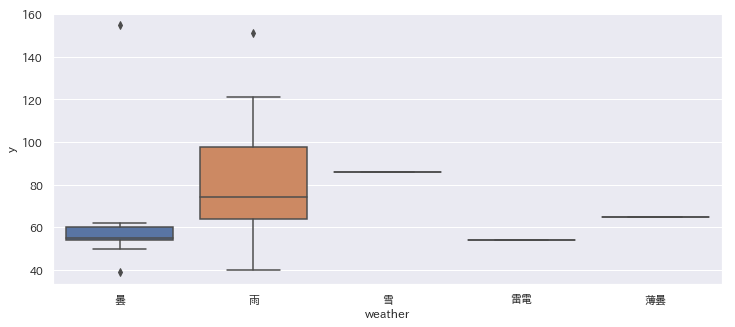

In [152]:
#雨降ったときの天候と販売数

plt.figure(figsize=(12,5))
sns.boxplot(x = df_pre["weather"],y = df_pre["y"],data = df_pre)

In [153]:
df_pre["float_precipitation"] = df_pre["precipitation"].astype("float")

print("最高降水量",df_pre["float_precipitation"].max())
print("最低降水量",df_pre["float_precipitation"].min())



最高降水量 6.5
最低降水量 0.0


C:\Users\TSS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([32.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.  , 0.65, 1.3 , 1.95, 2.6 , 3.25, 3.9 , 4.55, 5.2 , 5.85, 6.5 ]),
 <a list of 10 Patch objects>)

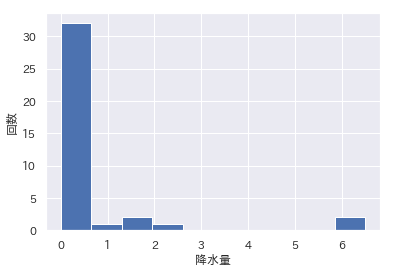

In [154]:
plt.xlabel("降水量")
plt.ylabel("回数")

plt.hist(df_pre["float_precipitation"])

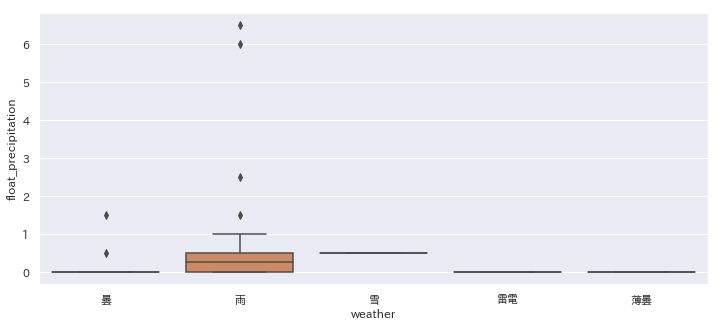

In [155]:
#雨降ったときの天候と降水量

plt.figure(figsize=(12,5))
sns.boxplot(x = df_pre["weather"],y = df_pre["float_precipitation"],data = df_pre)

    あまり関係性がみられない

# 特徴まとめ

    ・気温と販売数には負の相関関係がある
    ・特記事項「お楽しみメニュー」の場合平均的に販売数が多い
    ・「お楽しみメニュー」の中でも「カレー」系の場合が特に販売数が伸びている
    ・売り切れになりやすい弁当がいくつかあり、それらは販売日数が多い
    ・天候では、「快晴」の日は販売数が伸びている
    ・

In [157]:
from sklearn.model_selection import train_test_split#データ分割
from sklearn.preprocessing import StandardScaler#標準化

from sklearn.linear_model import LinearRegression#線形回帰
from sklearn.svm import SVR#SVR


# テストデータを加工して予測する

In [169]:
lunch_test_data.head()

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-2,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-3,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-6,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-7,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


In [ ]:
#それぞれでデータを同じように加工する
#気温、天候(ダミー化)、特記事項(ダミー化)、イベント(ダミー化)でいったん進める

#訓練データ
X_train_drop = lunch_train_data.drop(["name","precipitation","datetime","soldout","kcal","payday"],axis=1)
X_train_pro =  pd.get_dummies(X_train_drop)
print(X_train_pro.shape)


In [170]:
#それぞれでデータを同じように加工する
#気温、天候(ダミー化)、特記事項(ダミー化)、イベント(ダミー化)でいったん進める

#訓練データ
X_test_drop = lunch_test_data.drop(["name","precipitation","datetime","soldout","kcal","payday"],axis=1)
X_test_pro =  pd.get_dummies(X_test_drop)
print(X_test_pro.shape)


(40, 16)


In [171]:
print("訓練データのカラム",len(X_train_pro.columns))
print("テストデータのカラム",len(X_test_pro.columns))

train_set_columns = set(X_train_pro.columns)
test_set_columns = set(X_test_pro.columns)

train_set = list(train_set_columns - test_set_columns)
test_set = list(test_set_columns - train_set_columns)

print("",len(train_set))
print("",len(test_set))

#for i in train_set:
#    X_test_pro[i] = 0

#for i in test_set:
#    X_train_pro[i] = 0

X_train_pro = X_train_pro.drop(train_set,axis=1)
X_test_pro = X_test_pro.drop(test_set,axis=1)
    
print("訓練データのカラム",len(X_train_pro.columns))
print("テストデータのカラム",len(X_test_pro.columns))


訓練データのカラム 21
テストデータのカラム 16
 6
 1
訓練データのカラム 15
テストデータのカラム 15


In [193]:
X_train_pro.columns

Index(['temperature', 'week_月', 'week_木', 'week_水', 'week_火', 'week_金',
       'remarks_お楽しみメニュー', 'remarks_料理長のこだわりメニュー', 'event_キャリアアップ支援セミナー',
       'event_ママの会', 'weather_快晴', 'weather_晴れ', 'weather_曇', 'weather_薄曇',
       'weather_雨'],
      dtype='object')

In [172]:
#標準化

standard_scaler = StandardScaler()

standard_scaler.fit(X_train_pro)

X_train_standard_scaled = standard_scaler.transform(X_train_pro)
X_test_standard_scaled = standard_scaler.transform(X_test_pro)


C:\Users\TSS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TSS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\TSS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  


In [173]:
#線形回帰

lr = LinearRegression()

lr.fit(X_train_standard_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [174]:
#訓練データから予測すると
#y_pred = svr.predict(X_train_pro)
y_pred = lr.predict(X_test_standard_scaled)

In [175]:
#print("score:",svr.score(X_train_pro,y))
print("score:",lr.score(X_train_standard_scaled,y))

score: 0.6085314760796243


In [176]:
#テストデータの日付データ作成
date_test = pd.to_datetime(lunch_test_data["datetime"])

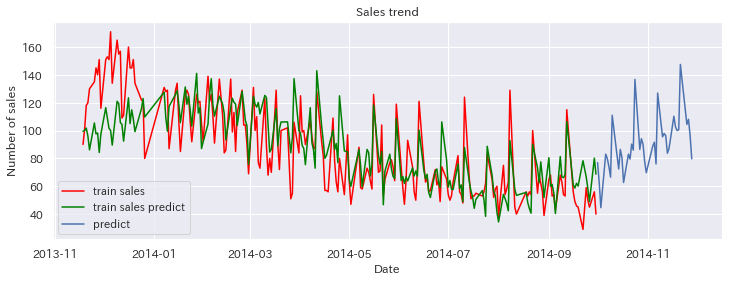

In [179]:
#販売数の推移
y_pred_train = lr.predict(X_train_standard_scaled)

plt.figure(figsize=(12,4))
#plt.plot(x1,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,y_pred_train,label="train sales predict",c = "green")

#テストデータ期間
plt.plot(date_test,y_pred,label="predict",c = "b")


plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()

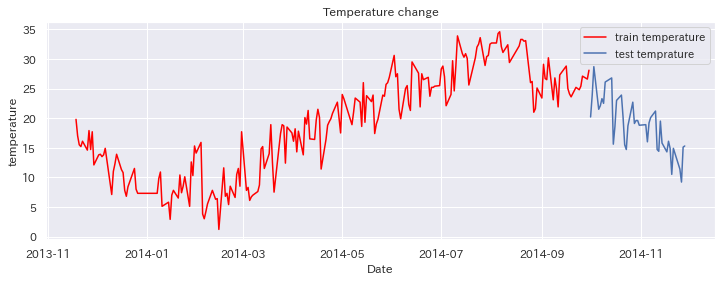

In [181]:
#気温の推移
plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["temperature"],label="train temperature",c= "red")

#テストデータ期間
plt.plot(date_test,lunch_test_data["temperature"],label="test temprature",c = "b")

plt.title("Temperature change")
plt.ylabel("temperature")
plt.xlabel("Date")
plt.legend()

    ファイルに出力

In [184]:
result = pd.DataFrame(lunch_test_data["datetime"])
print(result.shape)

y_pred_int = []

for i in y_pred:
    y_pred_int.append(int(i))

result["y"]= y_pred_int


(40, 1)


In [185]:
#結果の出力
result.to_csv("弁当_result_線形回帰.csv",index=False,header=False)

In [186]:
#SVRでモデル生成
svr = SVR()

#svr.fit(X_train_pro,y)
svr.fit(X_train_standard_scaled,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [187]:
#訓練データから予測すると
y_pred = svr.predict(X_test_standard_scaled)

In [188]:
#print("score:",svr.score(X_train_pro,y))
print("score:",svr.score(X_train_standard_scaled,y))

score: 0.1622569906206941


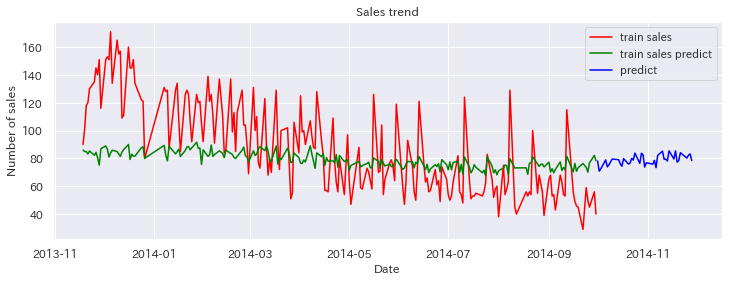

In [190]:
#販売数の推移

y_pred_train = svr.predict(X_train_standard_scaled)

plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,y_pred_train,label="train sales predict",c = "green")
plt.plot(date_test,y_pred,label="predict",c = "blue")


plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()



In [191]:
result = pd.DataFrame(lunch_test_data["datetime"])
print(result.shape)

y_pred_int = []

for i in y_pred:
    y_pred_int.append(int(i))

result["y"]= y_pred_int


(40, 1)


In [192]:
#結果の出力
result.to_csv("弁当_result_svr.csv",index=False,header=False)

In [207]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 10,max_depth = 5,random_state = 0)

In [208]:
#正規化は関係ない

rfr.fit(X_train_pro,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [209]:
y_pred = rfr.predict(X_test_pro)

In [210]:
print(rfr.score(X_train_pro,y))

0.9273582265774307


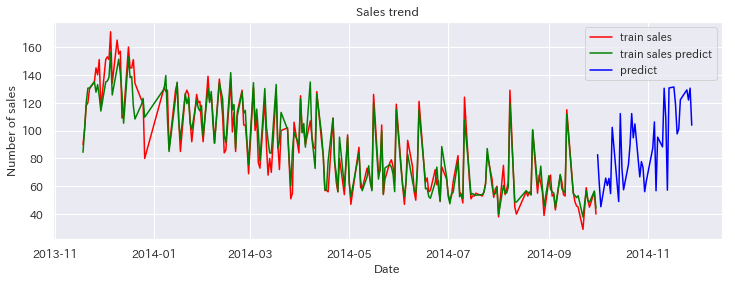

In [211]:
#販売数の推移

y_pred_train = rfr.predict(X_train_pro)

plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,y_pred_train,label="train sales predict",c = "green")
plt.plot(date_test,y_pred,label="predict",c = "blue")


plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()



In [212]:
result = pd.DataFrame(lunch_test_data["datetime"])
print(result.shape)

y_pred_int = []

for i in y_pred:
    y_pred_int.append(int(i))

result["y"]= y_pred_int


(40, 1)


In [213]:
#結果の出力
result.to_csv("弁当_result_ランダムフォレスト_10.csv",index=False,header=False)

# データ加工を少し変えてみる

    ・メニューを追加する「カレー類(ポークカレー、チキンカレー、キーマカレー)」のフラグ
    ・売り切れになる弁当と売り切れフラグ

In [232]:
#売り切れる弁当のリスト化
sold_out_menu = list(lunch_train_data[lunch_train_data["soldout"] == 1]["name"].unique())
print(type(sold_out_menu))
#カレー類のリスト化
curry_list = ["キーマカレー","ポークカレー","キーマカレー"]


<class 'list'>


In [225]:
df_data = lunch_train_data.drop(["precipitation","datetime","kcal","payday"],axis = 1)
df_data_test = lunch_test_data.drop(["precipitation","datetime","kcal","payday"],axis = 1)

In [229]:
df_data["soldoutmenu"] = 0
df_data["curryflg"] = 0

df_data_test["soldoutmenu"] = 0
df_data_test["curryflg"] = 0

In [230]:
df_data.head()

,y,week,soldout,name,remarks,event,weather,temperature,soldoutmenu,curryflg
0,90,月,0,厚切りイカフライ,NaN,NaN,快晴,19.8,0,0
1,101,火,1,手作りヒレカツ,NaN,NaN,快晴,17.0,0,0
2,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,快晴,15.5,0,0
3,120,木,1,若鶏ピリ辛焼,NaN,NaN,快晴,15.2,0,0
4,130,金,1,ビッグメンチカツ,NaN,NaN,快晴,16.1,0,0


In [238]:
#カラム追加

df_data.loc[df_data["name"].isin(sold_out_menu) == True,"soldoutmenu"] = 1
df_data.loc[df_data["name"].isin(curry_list) == True,"curryflg"] = 1

df_data_test.loc[df_data["name"].isin(sold_out_menu) == True,"soldoutmenu"] = 1
df_data_test.loc[df_data["name"].isin(curry_list) == True,"curryflg"] = 1

#name除去
df_data = df_data.drop(["name"],axis = 1)
df_data_test = df_data_test.drop(["name"],axis = 1)

In [239]:
#ダミー化
df_data_pro =  pd.get_dummies(df_data)
df_data_test_pro =  pd.get_dummies(df_data_test)


print(df_data_pro.shape)



(207, 25)


In [243]:
print("訓練データのカラム",len(df_data_pro.columns))
print("テストデータのカラム",len(df_data_test_pro.columns))

train_set_columns = set(df_data_pro.columns)
test_set_columns = set(df_data_test_pro.columns)

train_set = list(train_set_columns - test_set_columns)
test_set = list(test_set_columns - train_set_columns)

print("",len(train_set))
print("",len(test_set))

#for i in train_set:
#    X_test_pro[i] = 0

#for i in test_set:
#    X_train_pro[i] = 0

X_train_pro = df_data_pro.drop(train_set,axis=1)
X_test_pro = df_data_test_pro.drop(test_set,axis=1)
    
print("訓練データのカラム",len(X_train_pro.columns))
print("テストデータのカラム",len(X_test_pro.columns))

print("カラム",X_train_pro.columns)

訓練データのカラム 25
テストデータのカラム 19
 7
 1
訓練データのカラム 18
テストデータのカラム 18
カラム Index(['soldout', 'temperature', 'soldoutmenu', 'curryflg', 'week_月', 'week_木',
       'week_水', 'week_火', 'week_金', 'remarks_お楽しみメニュー',
       'remarks_料理長のこだわりメニュー', 'event_キャリアアップ支援セミナー', 'event_ママの会',
       'weather_快晴', 'weather_晴れ', 'weather_曇', 'weather_薄曇', 'weather_雨'],
      dtype='object')


In [246]:
#標準化

standard_scaler = StandardScaler()

standard_scaler.fit(X_train_pro)

X_train_standard_scaled = standard_scaler.transform(X_train_pro)
X_test_standard_scaled = standard_scaler.transform(X_test_pro)


C:\Users\TSS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\TSS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\TSS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [293]:
#SVRでモデル生成
svr = SVR()

svr.fit(X_train_pro,y)
#svr.fit(X_train_standard_scaled,y)

C:\Users\TSS\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [294]:
#訓練データから予測すると
y_pred = svr.predict(X_test_pro)
#y_pred = svr.predict(X_test_standard_scaled)

In [295]:
print("score:",svr.score(X_train_pro,y))
#print("score:",svr.score(X_train_standard_scaled,y))

score: 0.46321812100072157


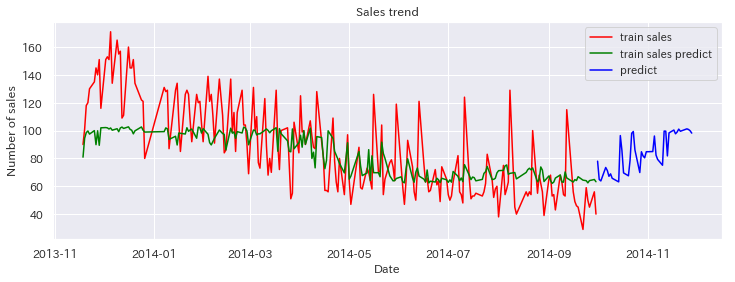

In [296]:
#販売数の推移
y_pred_train = svr.predict(X_train_pro)
#y_pred_train = svr.predict(X_train_standard_scaled)

plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,y_pred_train,label="train sales predict",c = "green")
plt.plot(date_test,y_pred,label="predict",c = "blue")


plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()



In [297]:
result = pd.DataFrame(lunch_test_data["datetime"])
print(result.shape)

y_pred_int = []

for i in y_pred:
    y_pred_int.append(int(i))

result["y"]= y_pred_int


(40, 1)


In [298]:
#結果の出力
result.to_csv("弁当_result_svr_flg_標準化なし.csv",index=False,header=False)

In [299]:
#線形回帰

lr = LinearRegression()

#lr.fit(X_train_standard_scaled,y)
lr.fit(X_train_pro,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [300]:
#訓練データから予測すると
#y_pred = svr.predict(X_train_pro)
y_pred = lr.predict(X_test_pro)

In [301]:
#print("score:",svr.score(X_train_pro,y))
print("score:",lr.score(X_train_pro,y))

score: 0.6179746684800065


In [302]:
lr.intercept_

101.60435243227847

In [303]:
lr.coef_

array([  0.07701723,  -2.78055952,   5.86629232,  16.0063842 ,
        10.97205247,  -4.94637171,   1.53531424,   4.46754766,
       -12.02854266,  52.55374535,  -1.95310731,   1.00576745,
        -5.49991575,  37.86032067,  31.68027987,  29.80068116,
        34.07654773,  24.64552928])

In [320]:
for i in range(0,12):
    print(X_train_pro.columns[i]," ",lr.coef_[i])

soldout   0.07701723349611961
temperature   -2.7805595186978196
soldoutmenu   5.866292315396269
curryflg   16.006384202844608
week_月   10.972052474651633
week_木   -4.946371712562276
week_水   1.535314240326364
week_火   4.467547660636779
week_金   -12.028542663052644
remarks_お楽しみメニュー   52.55374534531732
remarks_料理長のこだわりメニュー   -1.9531073090308793
event_キャリアアップ支援セミナー   1.0057674536025827


In [304]:
#テストデータの日付データ作成
date_test = pd.to_datetime(lunch_test_data["datetime"])

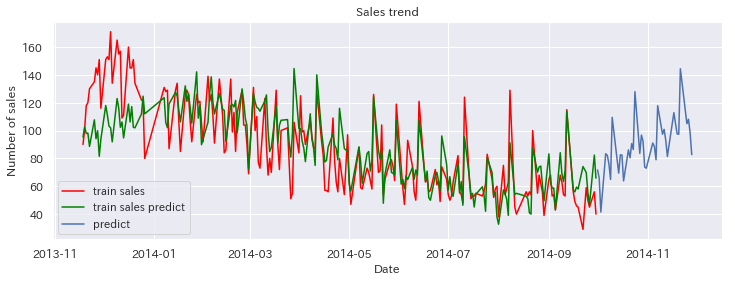

In [306]:
#販売数の推移
#y_pred_train = lr.predict(X_train_standard_scaled)
y_pred_train = lr.predict(X_train_pro)
plt.figure(figsize=(12,4))
#plt.plot(x1,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,y_pred_train,label="train sales predict",c = "green")

#テストデータ期間
plt.plot(date_test,y_pred,label="predict",c = "b")


plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()

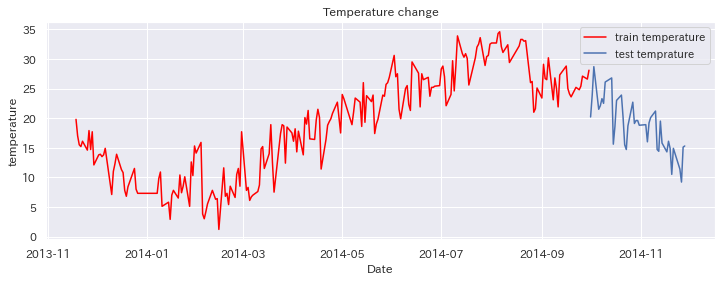

In [276]:
#気温の推移
plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["temperature"],label="train temperature",c= "red")

#テストデータ期間
plt.plot(date_test,lunch_test_data["temperature"],label="test temprature",c = "b")

plt.title("Temperature change")
plt.ylabel("temperature")
plt.xlabel("Date")
plt.legend()

    ファイルに出力

In [309]:
result = pd.DataFrame(lunch_test_data["datetime"])
print(result.shape)

y_pred_int = []

for i in y_pred:
    y_pred_int.append(int(i))

result["y"]= y_pred_int


(40, 1)


In [310]:
#結果の出力
result.to_csv("弁当_result_線形回帰_flg_標準化なし.csv",index=False,header=False)

In [279]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 10,max_depth = 5,random_state = 0)

In [280]:
#正規化は関係ない

rfr.fit(X_train_pro,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [281]:
y_pred = rfr.predict(X_test_pro)

In [282]:
print(rfr.score(X_train_pro,y))

0.835942803947233


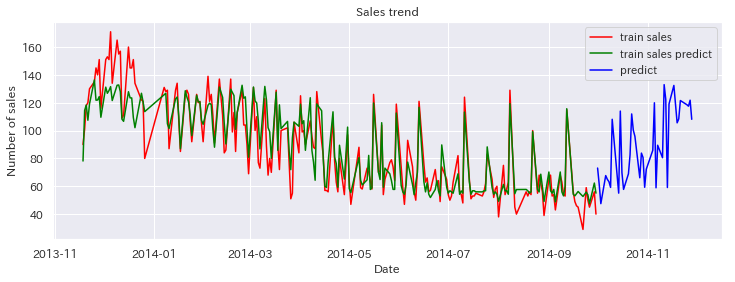

In [283]:
#販売数の推移

y_pred_train = rfr.predict(X_train_pro)

plt.figure(figsize=(12,4))
plt.plot(date,lunch_train_data["y"],label="train sales",c = "red")
plt.plot(date,y_pred_train,label="train sales predict",c = "green")
plt.plot(date_test,y_pred,label="predict",c = "blue")


plt.title("Sales trend")
plt.ylabel("Number of sales")
plt.xlabel("Date")
plt.legend()



In [284]:
result = pd.DataFrame(lunch_test_data["datetime"])
print(result.shape)

y_pred_int = []

for i in y_pred:
    y_pred_int.append(int(i))

result["y"]= y_pred_int


(40, 1)


In [285]:
#結果の出力
result.to_csv("弁当_result_ランダムフォレスト_flg.csv",index=False,header=False)

In [ ]:
#L1

